Link to GitHub repo: [github.com/mariimao/JSC270_HW3_2024_MZhao](https://github.com/mariimao/JSC270_HW3_2024_MZhao.git)

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# Approximating pi

## Method for Approximating $\pi$

Generating uniform pairs of random numbers between 0 and 1, will give us points within a unit square centred at $(\frac{1}{2}, \frac{1}{2})$. If we generate enough points with a uniform chance, we can assume the number of points can approximate the area of the square. We can then check if these pairs also belong in a circle within the square with a radius $r$ of $\frac{1}{2}$ units. In other words, we can check if $(x-\frac{1}{2})^2 + (y - \frac{1}{2})^2 \leq (\frac{1}{2})^2$. This will give us an approximate value for the area of the circle. Finally, we know the formula for the area of a circle is $\pi r^2$ and the area of the square is $(2r)^2 = 4 r^2$. Then we can see that:
$\frac{\text{Area of circle}}{\text{Area of square}} = \frac{\pi r^2}{4 r^2} \Rightarrow \pi = 4 \times \frac{\text{Area of circle}}{\text{Area of square}}$. We can see this in the simulation below.

In [3]:
# set seed
np.random.seed(1)

# simulate pairs of random numbers
trials = 10000000
x = np.random.uniform(0, 1, trials)
y = np.random.uniform(0, 1, trials)

# calculate the areas
area_square = trials # since all the points are in the square
area_circle = sum((x - 0.5) ** 2 + (y - 0.5) ** 2 <= 0.5 ** 2)

# print the result
print((area_circle / area_square) * 4)

3.1412852


## Number of Pairs Generated
In my implementation, I generated 10,000,000 pairs of uniform numbers. I choose this number because I wanted an accuracy of about 0.001 and as I was increasing the number of trials, this was the minimum amount that gave me that level of accuracy. It also took a reasonable amount of time to generate in Python.

## One Million Estimates

If we generated 1 million estimates of $\pi$, then I would expect the distribution to be symmetrical about $\pi$. This is because of the central limit theorem, which states that as we get more samples, the sampling distribution of the mean will similar to a normal distribution, which is symmetrical.

## Bonus
Say we want $E$ as the specific amount of error. Since the CLT tells us our pairs will be similar to a normal distribution as the number of trials increase, we can use the properties of a normal distribution. Using 2-sided confidence intervals, we know that $\bar{X} \pm z \times \frac{\sigma}{\sqrt{n}}$. So $E = z \times \frac{\sigma}{\sqrt{n}}$ where $z$ is the z-score for the corresponding confidence level, $\sigma$ is the standard deviation of the normal distribution, and $n$ is the number of trials. We can rearrange this to solve for $n$ and get $n=(\frac{z\sigma}{E})^2$.

# Understanding Bias

## Simulation

In [8]:
# set seed
np.random.seed(1)

# specify the parameters
n = [10, 25, 50, 100, 250, 500]
repetitions = 1000
mean = 2
std = 2
sample_variance_bias = [] # estimator 1
population_variance_bias = [] # estimator 2

# for each sample size
for i in n:
    # create lists for both estimators
    sample_variance = []
    population_variance = []

    # for each repetition
    for j in range(repetitions):
        # draw a sample
        sample = np.random.normal(mean, std, i)

        # calculate the estimators
        sample_variance.append(np.var(sample, ddof=1)) 
        population_variance.append(np.var(sample, ddof=0))

    # calculate the bias
    sample_variance_bias.append(np.mean(sample_variance) - std ** 2)
    population_variance_bias.append(np.mean(population_variance) - std ** 2)

    # print the results
    print(f"n = {i}: Sample Variance bias: {sample_variance_bias[-1]:.4f}, Population Variance bias: {population_variance_bias[-1]:.4f}")


n = 10: Sample Variance bias: -0.0012, Population Variance bias: -0.4011
n = 25: Sample Variance bias: 0.0014, Population Variance bias: -0.1587
n = 50: Sample Variance bias: -0.0027, Population Variance bias: -0.0827
n = 100: Sample Variance bias: -0.0319, Population Variance bias: -0.0716
n = 250: Sample Variance bias: 0.0075, Population Variance bias: -0.0085
n = 500: Sample Variance bias: -0.0031, Population Variance bias: -0.0111


## Plot

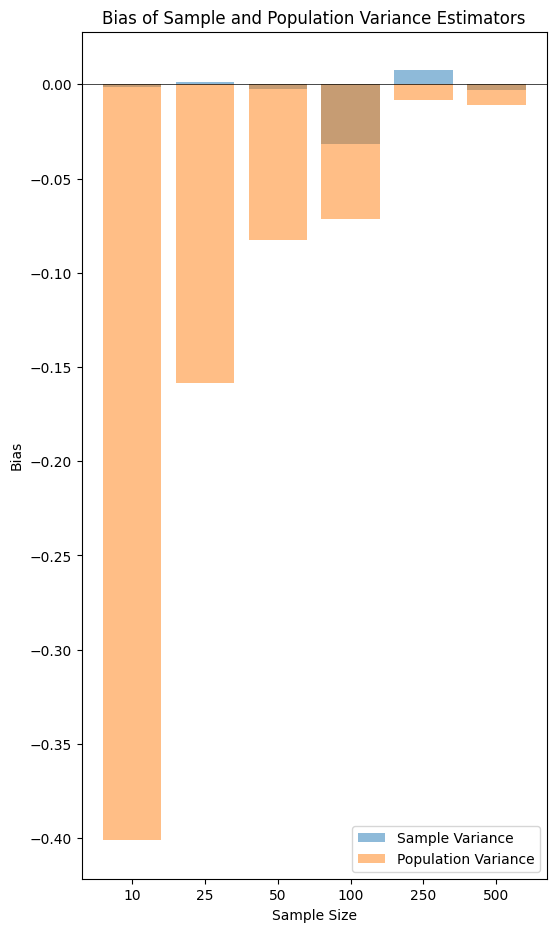

In [5]:
# change n to even spaced values
n_categories = np.arange(len(n))

# plot the bias vs sample size for both estimators
plt.figure(figsize=(6, 11))
plt.bar(n_categories, sample_variance_bias, label="Sample Variance", alpha=0.5)
plt.bar(n_categories, population_variance_bias, label="Population Variance", alpha=0.5)
plt.xticks(n_categories, n)
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
plt.title("Bias of Sample and Population Variance Estimators")
plt.xlabel("Sample Size")
plt.ylabel("Bias")
plt.legend()
plt.show()

## Which Estimate I Prefer

I prefer the first estimator (sample variance) since it has a lower bias compared to the second one (population variance). In the bar plot, we see that when $n$ is smaller, the population variance has a greater bias (usually understates the value) while the sample variance has a smaller, almost non-existent bias. Since we want to be closer to the true value of $\sigma^2$, we will choose the estimator with a lower bias, so the sample variance is preferred.

## Steps to Evaluate Bias of Slope Parameter

1. Decide values for the true slope and true intercept of the linear regression model. (We can do this with the linear regression function in Python and analyzing the data, or calculate it manually using the formulas).
2. For some range of $x$-values, calculate a random value for $y$ based on the parameters defined earlier with some error. For example, we can define the $x$-values to be 100 evenly spaced values between 0 and 10 using `np.linspace` and $y$ to be `mx + b + error` where `error` is a randomly generated value from $N(0,1)$.
3. Using these data points, we can then fit a model and compare the estimated slope parameter with the true slope we chose earlier. We can calculate the bias by subtracting them.
4. We can try to find a more reliable estimate for the bias by repeating steps 2-3 a few times (e.g. 1000 times) and taking the average of all the biases.
5. If the bias is close to zero, then we can conclude the estimater is likelyt to be unbiased. If the bias is not close, then that mean we are overstating or understating the slope parameter.

## Parameters for Simulation

We need to specify the true slope (in step 1), the true intercept (in step 1), the number of points generated (in step 2), the variance (in step 2), and the number of repetitions (in step 4). 

For the true slope and intercept, we can choose any value that seems reasonable based on the dataset and context. 

For the number of points generated, we can choose a number large enough so that we can apply the CLT but still have a reasonable running time for the simulation in Python.

For the variance, we can choose it based off the specific dataset.

The number of repetitions should be large enough that we can apply CLT to the estimate of the bias but still keeping the running time reasonable in Python.

# Simulation IRL

## Time Series Generation Weakness

In the article, the author disclaimed "there's a time and place for generating random numbers, like assignments during random sampling, but not often for analysis." This, of course, tells us that generating random number with `random.randint` can be considered a weakness in their example since it is not useful for analysis. Usually, real-world data display trends over time so we generate data to help us find estimators for certain parameters. With the author's suggestion of using random numbers, it does not help us with finding estimators.

## Meta Simulator Advantages and Disadvantages

**Advantages:** By simulating user behaviour with bots in an isolated controlled environment, we can more accurately detect harmful behaviour without impacting real users. Furthermore, the simulator can help speed up the process of creating a safer and more welcoming social media platform by flagging harmful behaviour quicker.


**Disadvantages:** The simulation cannot examine everyone's behaviour and cannot accurately predict how they might change over time. There will be complex interactions that the simulator cannot account for that will lead to inaccuracies in detecting harmful behaviour. This can also raise ethical concerns regarding privacy and consent. Some people will be skeptical of the collection and analysis of their data and choose to opt out.

## IBM's Project Photoresist Review

The team at IBM want to find a way to develop or discover a more sustainable photo acid generators, a material used in manufacturing semiconductor devices. After analyzing list of materials from patents, they found a possible material. However, it did not have much information about it. So they used AI-enriched simulations to augment their dataset and speed up the learning process. 

Some weaknesses to their approach was solely relying on simulations since there may be flaws with data quality and algorithms used. I think some real-world testing to verify their results could help descrease uncertainty regarding their results.

What I liked about their approach was the incorporation of AI-enriched simulations to speed up the discovery process. I think it is very innovative and will be useful for making initial predictions for properties of materials and chemical compounds.

# Asymptotic Behaviour

## Investigating Mean of Exponential Distribution

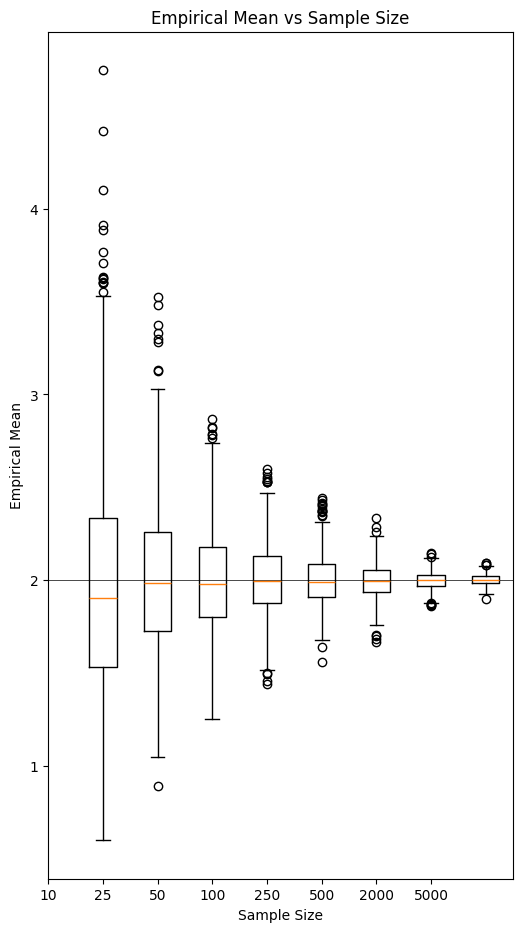

In [9]:
# set seed
np.random.seed(1)

# specify the parameters
n = [10, 25, 50, 100, 250, 500, 2000, 5000]
repetitions = 1000
mean = 2
empirical_mean = []

# for each sample size
for i in n:
    means = []

    # for each repetition
    for j in range(repetitions):
        # draw a sample
        sample = np.random.exponential(size = i, scale = 2)

        # calculate the sample mean
        means.append(np.mean(sample))
    
    # empirical mean
    empirical_mean.append(means)
    
# change n to even spaced values
n_categories = np.arange(len(n))

# plot the bias vs sample size for both estimators
plt.figure(figsize=(6, 11))
plt.boxplot(empirical_mean, labels=n)
plt.xticks(n_categories, n)
plt.axhline(2, color='black', linestyle='-', linewidth=0.5)
plt.title("Empirical Mean vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Empirical Mean")
plt.show()


From the box plot, we see that as the sample size increases, the interquartile range shrinks and becomes closer to the expected value of 2. This is the pattern we expect to see because of CLT, which tells us that as the sample size grows, the sampling distribution of the mean converges to a normal distribution and becomes more narrower. A similar pattern will appear with an exponential distribution with a different mean since CLT does not depend on what the parameters are.

## Investigating Mean of Cauchy Distribution

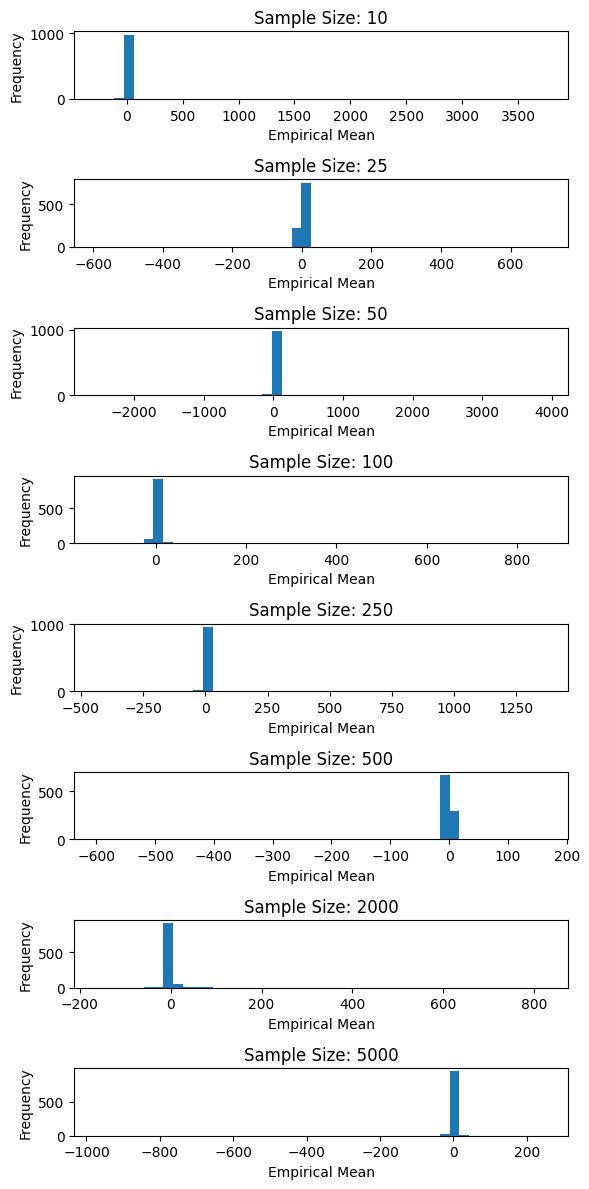

In [7]:
# set seed
np.random.seed(1)

# specify the parameters
n = [10, 25, 50, 100, 250, 500, 2000, 5000]
repetitions = 1000
empirical_mean = []

# for each sample size
for i in n:
    means = []

    # for each repetition
    for j in range(repetitions):
        # draw a sample
        sample = np.random.standard_cauchy(size=i)

        # calculate the sample mean
        means.append(np.mean(sample))
    
    # empirical mean
    empirical_mean.append(means)

# create subplots for each sample size
fig, axs = plt.subplots(len(n), figsize=(6, 12))
# iterate over each sample size
for i, sample_size in enumerate(n):
    # create histogram for the corresponding sample size
    n, bins, patches = axs[i].hist(empirical_mean[i], bins=50)
    axs[i].set_title(f"Sample Size: {sample_size}")
    axs[i].set_xlabel("Empirical Mean")
    axs[i].set_ylabel("Frequency")
    axs[i].set_xlim(min(empirical_mean[i]), max(empirical_mean[i]))
plt.tight_layout()

Unlike the first part, we do not see the histograms become narrower and symmetric. What we do see is that most of the numbers are relatively close to zero but there are a few very extreme outliers. This was not the pattern I expected but upon researching Cauchy distribution, it does makes sense. The Cauchy distribution does not have a proper variance, so although it looks bell-curved like a normal distribution, it does not meet the conditions for applying CLT. 

# Logistic Regression

## Interpretation of $\beta_1$

The slope parameter $\beta_1$ tells us how much the log-odds change for one unit increase in $X$. We know this because in lectures, we saw that $\log(odds(P(Y=1|X))) = \beta_0 + \beta_1 X$. So if $X$ increases by 1, then $\log(odds(P(Y=1|X)))$ will increase by $\beta_1$.


## Interpretation of $e^{\beta_1}$

The $e^{\beta_1}$ tells us how much the odds of $Y=1$ change for one unit increase in $X$. This follows from our interpretation of $\beta_1$

## Explaining Logistic Regression Model to Collaborators

I would present the estimate of $e^{\beta_1}$ to explain the results since the change in odds is easier to interpret and more commonly used than the change in log-odd. For example if $e^{\beta_1} = 2$, then it means that for one increase in $X$, the odds of $Y=1$ happening increase by 2. This is much easier to understand than the log-odds of $Y=1$ happening increase by 2.